# Tarea 7. Estimación del riesgo sistemático ($\beta$).

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/6e/Separation_theorem_of_MPT.svg/2000px-Separation_theorem_of_MPT.svg.png" width="400px" height="400px" />

**Resumen.**
> En esta tarea aplicarás la técnica aprendida en clase para la estimación del coeficiente de riesgo sistemático $\beta$, el cual es primordial en el modelo de valoración de activos en equilibrio CAPM.

**Criterio de revisión.**
> Se te calificará de acuerdo a los resultados finales que reportes, basados en tu análisis.

**Antes de comenzar.**
> Por favor, copiar y pegar este archivo en otra ubicación. Antes de comenzar, nombrarlo *Tarea7_ApellidoNombre*, sin acentos y sin espacios; por ejemplo, en mi caso el archivo se llamaría *Tarea7_JimenezEsteban*. Resolver todos los puntos en dicho archivo y subir en este espacio.

## 1. Selección de activos (10 puntos)

Seleccionar cinco (5) activos de su preferencia y enunciarlos en una celda en formato Markdown.

    AC, ALSEA, AMXL, GRUMAB, WALMEX y el Indice: IPC (^MXX)

## 2. Descarga de datos (10 puntos)

Descargar los precios mensuales ajustados en el cierre para el índice S&P 500 (^GSPC) y para los activos seleccionados en los últimos tres años.

1. Graficar los precios (5 puntos).
2. Graficar los rendimientos (5 puntos).

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [47]:
csv = ['AC', 'ALSEA', 'AMXL', 'GRUMAB', 'WALMEX']
data = [pd.read_csv(i + '.MX.csv')['Adj Close'] for i in csv]
data.append(pd.read_csv('^MXX.csv')['Adj Close'])

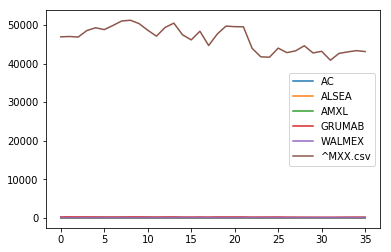

In [130]:
indx = ['AC', 'ALSEA', 'AMXL', 'GRUMAB', 'WALMEX','^MXX.csv']
Closes = pd.DataFrame(data,index=indx).T
Closes.plot()

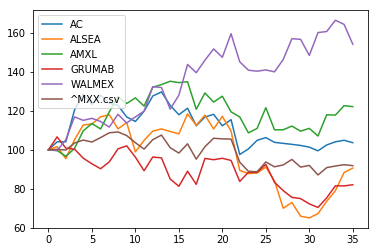

In [131]:
base = np.ones(Closes.shape)
for i in range(len(base.T)):
    base[:,i] = Closes.iloc[0,i]
base100 = Closes/base*100
base100.plot()

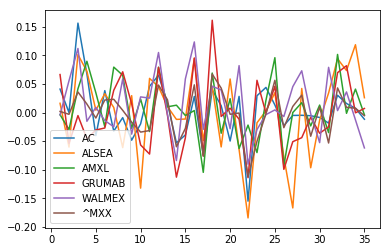

In [50]:
pct = Closes.pct_change().dropna()
pct.plot()

## 3. Calculando los coeficientes $\beta$ (50 puntos)

Usando los datos de rendimientos mensuales calculados en el punto anterior:

1. Estime el valor del coeficiente de riesgo sistemático $\beta$ para cada uno de los activos seleccionados, con el método visto en clase (5 puntos por cada activo).
2. Compare su estimación de $\beta$ con el valor reportado en Yahoo! Finance mediante el error relativo: 
$$e_{relativo}=\frac{\beta_{estimado}-\beta_{Yahoo!}}{\beta_{Yahoo!}}.$$
Concluya de acuerdo al valor del error relativo obtenido (5 puntos por cada activo).

In [51]:
Cov = pct.cov()
Cov

,AC,ALSEA,AMXL,GRUMAB,WALMEX,^MXX
AC,0.002619,0.002033,0.000804,0.001408,0.001486,0.001326
ALSEA,0.002033,0.005413,0.001592,0.002211,0.000800,0.001544
AMXL,0.000804,0.001592,0.002643,0.001484,0.000319,0.001232
GRUMAB,0.001408,0.002211,0.001484,0.003949,0.001171,0.001617
WALMEX,0.001486,0.000800,0.000319,0.001171,0.002824,0.001024
^MXX,0.001326,0.001544,0.001232,0.001617,0.001024,0.001571


In [53]:
# Calculamos las betas para cada uno de los activos. 
Ipc = np.ones(Cov.loc['^MXX'].shape)*Cov.loc['^MXX','^MXX']
Betas_nuestras = Cov.loc['^MXX']/Ipc
Betas_nuestras

AC        0.843895
ALSEA     0.982398
AMXL      0.783828
GRUMAB    1.029160
WALMEX    0.651939
^MXX      1.000000
Name: ^MXX, dtype: float64

In [55]:
# Datos consultados de finance.yahoo.com (la posición referente al indice se asume como 1 para evitar errores algebraicos.)
Betas_Yahoo = pd.Series([0.33, 0.09, 0.43, -0.18, 0.01, 1],index=indx)
Betas_Yahoo

AC        0.33
ALSEA     0.09
AMXL      0.43
GRUMAB   -0.18
WALMEX    0.01
^MXX      1.00
dtype: float64

In [56]:
# se calcula el error relativo a nuestras Betas estimadas. 
Error_relativo = Betas_nuestras/Betas_Yahoo-1

AC         1.557256
ALSEA      9.915531
AMXL       0.822856
GRUMAB    -6.717557
WALMEX    64.193884
^MXX       0.000000
dtype: float64

Las Betas que nosotros hemos estimado son muy diferentes en todos los casos, especialmente en walmex. Existe un único caso rescatable; Amxl, aún así, la diferencia entre el estimado y el valor propuesto por Yahoo varían demasiado. Uno de los posibles motivos por el cual se disparan tanto las diferencias es por la forma en la que se calcula el error relativo, si el denominador es suficientemente pequeño se obtendrán cifras demasiado grandes. Aun así, la métrica del error relativo es buena y describe la diferencia proporcional entre un resultado y el otro. A pesar de las diferencias existentes entre nuestras Betas propuestas y las Betas de Yahoo, uno de los activos (Grumab) aparece en negativo en los dos casos, aunque la escala es diferente. 

## 4. Gráfico y conclusiones (30 puntos)

1. Grafique cada uno de los activos en el espacio de $E[r]$ (eje $y$) vs. $\beta$ (eje $x$) (10 puntos).
2. Ajuste una línea recta a los puntos obtenidos. Dar la ecuación (10 puntos).
3. De la ecuación obtenida, identifique el valor de la tasa libre de riesgo $r_f$, y el valor del rendimiento esperado del portafolio de mercado $E[r_M]$. Compare este último con el rendimiento esperado del índice S&P500 (10 puntos).

In [170]:
X = Betas_nuestras[:-1]
Y = pct.mean()[:-1]*12
X, Y

(AC        0.843895
 ALSEA     0.982398
 AMXL      0.783828
 GRUMAB    1.029160
 WALMEX    0.651939
 Name: ^MXX, dtype: float64, AC        0.027716
 ALSEA    -0.000708
 AMXL      0.084184
 GRUMAB   -0.044779
 WALMEX    0.165578
 dtype: float64)

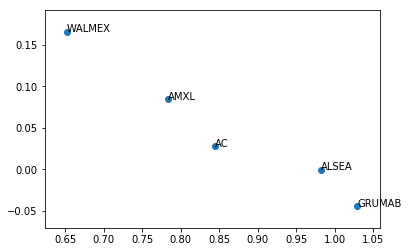

In [174]:
plt.scatter(X,Y)
for i in range(len(X)):
    plt.text(X[i],Y[i],indx[i])

In [175]:
A = np.ones((len(X),2))
A[:,1] = X
A
b = Y.values

In [176]:
np.linalg.pinv((A.T.dot(A))).dot(A.T).dot(b) # 0.4948 -0.5225x

array([ 0.49488795, -0.52256686])

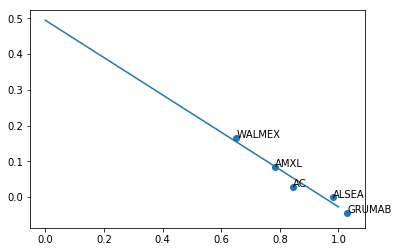

In [177]:
plt.scatter(X,Y)
for i in range(len(X)):
    plt.text(X[i],Y[i],indx[i])
plt.plot([0,1],[0.4948,-0.0277])

Considerando las betas propuestas por nosotros: Los resultados no son cercanos a lo esperado, mientras más riesgo de mercado se asume se adquieren más perdidas. Por lo tanto, se intentará seguir el mismo procedimiento, pero con los datos proporcionados por Yahoo finance. 

In [178]:
X = Betas_Yahoo[:-1]
Y = pct.mean()[:-1]*12
X, Y

(AC        0.33
 ALSEA     0.09
 AMXL      0.43
 GRUMAB   -0.18
 WALMEX    0.01
 dtype: float64, AC        0.027716
 ALSEA    -0.000708
 AMXL      0.084184
 GRUMAB   -0.044779
 WALMEX    0.165578
 dtype: float64)

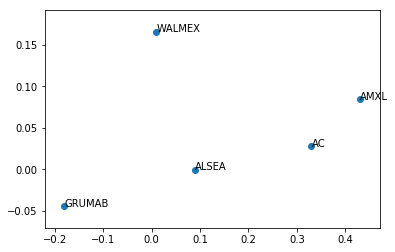

In [179]:
plt.scatter(X,Y)
for i in range(len(X)):
    plt.text(X[i],Y[i],indx[i])

In [180]:
A = np.ones((len(X),2))
A[:,1] = X
A
b = Y.values

In [181]:
np.linalg.pinv((A.T.dot(A))).dot(A.T).dot(b) # 0.03321 + 0.0969x

array([0.03321698, 0.09692022])

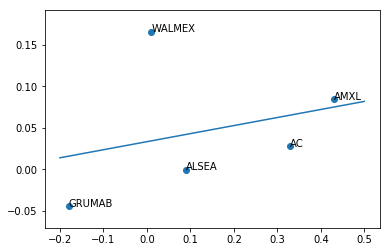

In [184]:
plt.scatter(X,Y)
for i in range(len(X)):
    plt.text(X[i],Y[i],indx[i])
plt.plot([-0.2,0.5],[0.01381,0.08165])

In [186]:
 pct.mean()

AC        0.002310
ALSEA    -0.000059
AMXL      0.007015
GRUMAB   -0.003732
WALMEX    0.013798
^MXX     -0.001642
dtype: float64

En este caso, la regresión lineal tiene un cruce en el eje de las 'Y' en 0.03321, esto implica que x=0; siendo x la variable que representa a las Betas se puede decir que la covarianza entre el activo en cuestión y el mercado es 0. Debido a que no existe ninguna forma de tener activos sin covarianza al comportamiento del mercado se tomará por supuesto que el cruce en 0 representa la tasa libre de riesgo. Por otra parte, la tasa esperada del mercado se dará cuando la covarianza entre un activo y el mercado dividida entre la varianza del mercado sea igual a 1. Debido a que este último supuesto es improbable que suceda con un activo diferente al mercado en sí, se tomará por hecho que cuando x=1 se encuentra el rendimiento esperado del mercado. En este caso, el rendimiento esperado del mercado es de 13.014% (muy lejano a la realidad, ya que el rendimiento real del mercado en los últimos 3 años ha sido de -0.16%.) 

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>